In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
KPMG= pd.read_excel("KPMG.xlsx", sheet_name=["Transactions","NewCustomerList","CustomerDemographic","CustomerAddress"])

C:\Users\HP\AppData\Local\Temp/ipykernel_18444/3770145950.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  KPMG= pd.read_excel("KPMG.xlsx", sheet_name=["Transactions","NewCustomerList","CustomerDemographic","CustomerAddress"])


In [3]:
KPMG.keys()

dict_keys(['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])

In [4]:
Transactions= KPMG["Transactions"]
NewCustomerList= KPMG['NewCustomerList']
CustomerDemographic= KPMG['CustomerDemographic']
CustomerAddress= KPMG['CustomerAddress']

In [5]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


### DATA QUALITY CHECKS
- ACCURACY - DESCRIBE
- COMPLETENESS - INFO
- CONSISTENCY - INFO
- TIMELINESS - WORK ON DATES - SORRTING
- VALIDITY - 
- UNIQUENESS (DUPLICATES)

In [6]:
for i in [Transactions,NewCustomerList,CustomerDemographic,CustomerAddress]:
          i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

## TRANSACTIONS

In [7]:
# we are converting the column product_first_sold_date to a datetimes dtype
Transactions["product_first_sold_date"]= pd.to_datetime(Transactions["product_first_sold_date"]).dt.date

In [8]:
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [9]:
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [11]:
# Transactions.dropna(axis="index", how="all", subset=["brand", 
#                                                      "product_line",
#                                                      "product_class",
#                                                      "product_size",
#                                                      "standard_cost",
# #                                                      "product_first_sold_date"], inplace=True)

###### Timeliness

In [12]:
Transactions.transaction_date.sort_values(ascending=True)[:5]

516     2017-01-01
5876    2017-01-01
3459    2017-01-01
12484   2017-01-01
19130   2017-01-01
Name: transaction_date, dtype: datetime64[ns]

###### Uniqueness

In [13]:
Transactions.duplicated().sum()

0

**We need to add the profit columns**

In [14]:
Transactions["Profit"]= Transactions["list_price"]- Transactions["standard_cost"]

## NEW CUSTOMER LIST

In [15]:
NewCustomerList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.754080,0.847190,0.952683,0.879094,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.206227,0.251466,0.300372,0.283298,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.700000,0.650781,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.770000,0.840000,0.950000,0.854250,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.040000,1.175000,1.087500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [16]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [17]:
NewCustomerList["gender"].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [18]:
NewCustomerList["gender"].replace("U", "UnSpecified", inplace=True)

In [19]:
NewCustomerList.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20'], inplace=True)

In [20]:
NewCustomerList.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [21]:
NewCustomerList.duplicated().sum()

0

In [22]:
NewCustomerList.DOB.sort_values(ascending=True)[:5]

797   1938-06-08
885   1938-06-09
769   1938-08-05
585   1938-08-30
265   1938-08-31
Name: DOB, dtype: datetime64[ns]

## CUSTOMER DEMOGRAPHIC

In [23]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [24]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [25]:
CustomerDemographic['default']

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [26]:
CustomerDemographic.drop(columns='default', inplace=True)

In [27]:
CustomerDemographic["gender"].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [28]:
CustomerDemographic["gender"].replace("U", "UnSpecified", inplace=True)
CustomerDemographic["gender"].replace("F", "Female", inplace=True)
CustomerDemographic["gender"].replace("Femal", "Female", inplace=True)
CustomerDemographic["gender"].replace("M", "Male", inplace=True)

In [29]:
CustomerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [30]:
CustomerDemographic.duplicated().sum()

0

In [31]:
CustomerDemographic.DOB.sort_values(ascending=True)[:5]

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
Name: DOB, dtype: datetime64[ns]

**1843-12-21 - There is no way someone was born in the year 1843 and still alive to purchase the bike**

## CUSTOMER ADDRESS

In [32]:
CustomerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [33]:
CustomerAddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [34]:
CustomerAddress.duplicated().sum()

0

## DATA PRESENTATION DATA EXPLORATION

### DATA EXPLORATION

In [35]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit'],
      dtype='object')

In [36]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [37]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [38]:
# New_Demographic= pd.merge(CustomerDemographic, NewCustomerList, on=['gender', 
#                                                                     'past_3_years_bike_related_purchases',
#                                                                     'DOB',
#                                                                     'job_title',
#                                                                     'job_industry_category',
#                                                                     'wealth_segment',
#                                                                     'deceased_indicator',
#                                                                     'owns_car'])

# CODE WONT WORK CAUSE YOU NEED TO DROP THE NULL VALUES

In [39]:
New_Demographic= pd.merge(CustomerDemographic, NewCustomerList, how="outer")
                                                                                                       

In [40]:
print(CustomerDemographic.shape)
print(NewCustomerList.shape)
print(New_Demographic.shape)

(4000, 12)
(1000, 18)
(5000, 19)


In [41]:
New_Transactions= pd.merge(Transactions, New_Demographic, on= "customer_id")

In [42]:
New_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [43]:
New_Transactions["transaction_date"]= New_Transactions["transaction_date"].sort_values(ascending=True)

In [44]:
New_Transactions["Recency"]= New_Transactions["transaction_date"].max()-New_Transactions["transaction_date"].sort_values(ascending=False)

In [45]:
New_Transactions["Recency"]= New_Transactions["Recency"].dt.days

In [46]:
New_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [47]:
pivot= pd.pivot_table(New_Transactions, values=["Recency","transaction_id", "Profit"], index=["customer_id"], aggfunc={'Recency': np.min,
                                                                                                            'transaction_id': len,
                                                                                                            'Profit': np.sum})

pivot.rename(columns={
    "transaction_id":"Frequency",
    "Profit":"MonetaryValue"}, inplace=True)

In [48]:
pivot.describe()

,MonetaryValue,Recency,Frequency
count,3493.000000,3493.000000,3493.000000
mean,3129.119519,60.807043,5.724878
std,1770.128368,57.794061,2.325749
min,15.080000,0.000000,1.000000
25%,1841.730000,17.000000,4.000000
50%,2862.330000,44.000000,6.000000
75%,4183.810000,85.000000,7.000000
max,11668.950000,353.000000,14.000000


In [49]:
# Define a function to calculate customer title based on RFM values
# def customer_title(r, f, m):
#     if r <= 60 and f >= 9 and m >= 4000:
#         return 'Gold'
#     elif r <= 60 and f >= 5 and m >= 3000:
#         return 'Silver'
#     else:
#         return 'Bronze'

# # Create the customer title column in rfm using the customer_title function
# pivot['Customer Title'] = pivot.apply(lambda row: customer_title(row['Recency'], row['Frequency'], row['MonetaryValue']), axis=1)

In [50]:
# Step 2: Rank the customers by their Recency, Frequency, and MonetaryValue, and assign a score from 1 to 5 for each category
pivot['R'] = pd.qcut(pivot['Recency'], 5, labels=[5, 4, 3, 2, 1])
pivot['F'] = pd.qcut(pivot['Frequency'], 5, labels=[1, 2, 3, 4, 5])
pivot['M'] = pd.qcut(pivot['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5])

# Step 3: Concatenate the three scores to create the RFM score
pivot['RFM Score'] = pivot['R'].astype(str) + pivot['F'].astype(str) + pivot['M'].astype(str)



In [51]:
pivot.head(100)

,MonetaryValue,Recency,Frequency,R,F,M,RFM Score
customer_id,,,,,,,
1,3018.09,7,11,5,5,3,553
2,2226.26,128,3,1,1,2,112
3,3362.81,102,8,1,4,4,144
4,220.57,195,2,1,1,1,111
5,2394.94,16,6,4,3,2,432
...,...,...,...,...,...,...,...
96,1135.25,70,4,2,1,1,211
97,4911.21,102,8,1,4,5,145
98,1930.56,122,5,1,2,2,122


In [52]:
# Define a function to calculate customer title based on RFM values
pivot["RFM Score"]= pivot["RFM Score"].astype(int)
def customer_title(row):
    if row["RFM Score"] > 411:
        return 'Platinum'
    elif row["RFM Score"] <= 411 and row["RFM Score"] > 311:
        return 'Gold'
    elif row["RFM Score"] <= 311 and row["RFM Score"] > 211:
        return 'Silver'
    else:
        return 'Bronze'

# Create the customer title column in rfm using the customer_title function
pivot['Customer Title'] = pivot.apply(customer_title, axis=1)

In [53]:
pivot

,MonetaryValue,Recency,Frequency,R,F,M,RFM Score,Customer Title
customer_id,,,,,,,,
1,3018.09,7,11,5,5,3,553,Platinum
2,2226.26,128,3,1,1,2,112,Bronze
3,3362.81,102,8,1,4,4,144,Bronze
4,220.57,195,2,1,1,1,111,Bronze
5,2394.94,16,6,4,3,2,432,Platinum
...,...,...,...,...,...,...,...,...
3496,2045.84,256,4,1,1,2,112,Bronze
3497,1648.32,52,3,3,1,2,312,Gold
3498,3147.33,127,6,1,3,3,133,Bronze


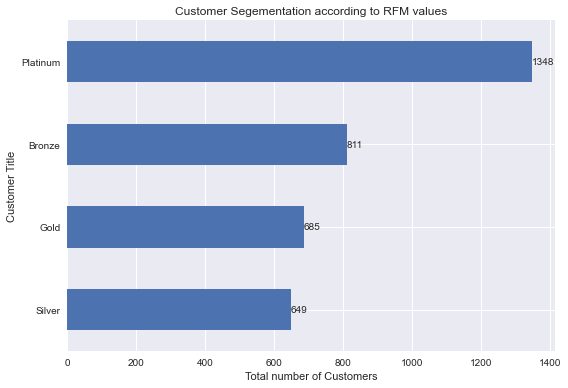

In [54]:
segementation = pivot["Customer Title"].value_counts().sort_values(ascending=True)

plt.style.use("seaborn")

ax= segementation.plot.barh()

plt.title("Customer Segementation according to RFM values")
plt.xlabel("Total number of Customers")
plt.ylabel("Customer Title")

plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)

plt.savefig("RFM_score.png")
plt.show()

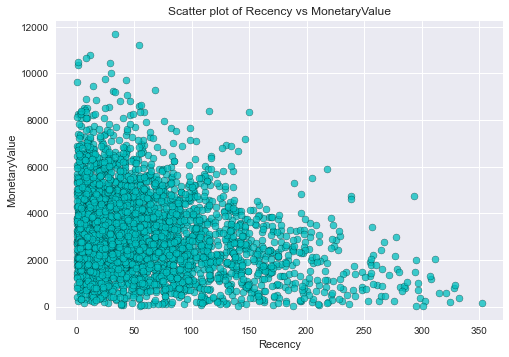

In [97]:
plt.scatter(pivot["Recency"], pivot["MonetaryValue"], color= "c", alpha=0.75, edgecolors="black")

plt.title("Scatter plot of Recency vs MonetaryValue")
plt.xlabel("Recency")
plt.ylabel("MonetaryValue")

plt.savefig("Scatter Recency vs MonetaryValue")
plt.show()

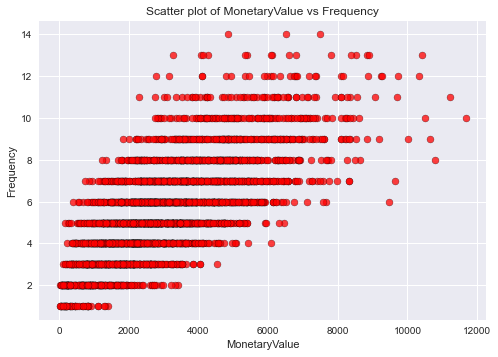

In [98]:
plt.scatter(pivot["MonetaryValue"], pivot["Frequency"], color= "r", alpha=0.75, edgecolors="black")

plt.title("Scatter plot of MonetaryValue vs Frequency")
plt.xlabel("MonetaryValue")
plt.ylabel("Frequency")

plt.savefig("Scatter MonetaryValue vs Frequency")
plt.show()

In [55]:
pivot.reset_index(inplace=True)
C_T= pivot[["customer_id","Customer Title"]]

In [56]:
C_T

,customer_id,Customer Title
0,1,Platinum
1,2,Bronze
2,3,Bronze
3,4,Bronze
4,5,Platinum
...,...,...
3488,3496,Bronze
3489,3497,Gold
3490,3498,Bronze
3491,3499,Gold


In [57]:
type(C_T)
# type(NewCustomerList)

pandas.core.frame.DataFrame

In [58]:
New_CustomerTitle= pd.merge(C_T, New_Transactions, on="customer_id", how="inner")

In [59]:
New_CustomerTitle.shape

(19997, 34)

In [60]:
New_CustomerTitle.isna().sum()

customer_id                                0
Customer Title                             0
transaction_id                             0
product_id                                 0
transaction_date                           0
online_order                             360
order_status                               0
brand                                    197
product_line                             197
product_class                            197
product_size                             197
list_price                                 0
standard_cost                            197
product_first_sold_date                  197
Profit                                   197
first_name                                 0
last_name                                642
gender                                     0
past_3_years_bike_related_purchases        0
DOB                                      446
job_title                               2394
job_industry_category                   3229
wealth_seg

In [61]:
New_CustomerTitle.duplicated().sum()

0

**VALUES FOR VISUALIZATION**
- Wealth Segment
- Owns car
- Gender
- Customer title
- past_3_years_bike_related_purchases

**with Na values**
- brand 
- profit

In [62]:
df= New_CustomerTitle.groupby("Customer Title")["gender"].value_counts().unstack()
df.sort_values(by=["Female","Male","UnSpecified"], ascending=True, inplace=True)

In [63]:
df

gender,Female,Male,UnSpecified
Customer Title,,,
Bronze,1664,1579,76
Silver,1844,1763,54
Gold,2178,1958,57
Platinum,4325,4231,268


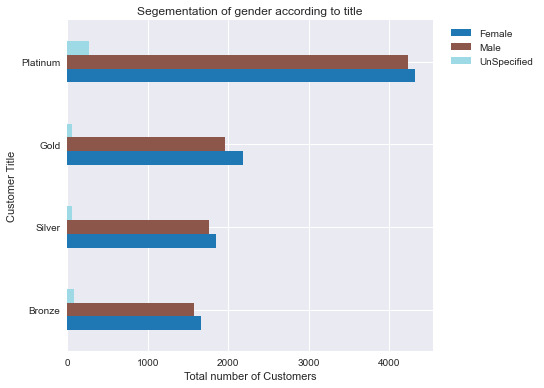

In [64]:
plt.style.use('seaborn')
ax= df.plot.barh(cmap="tab20")

plt.xlabel("Total number of Customers")
plt.ylabel("Customer Title")
plt.title("Segementation of gender according to title")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tight_layout()


plt.savefig("Gender vs Customer Title.png")

plt.show()

In [65]:
New_CustomerTitle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19997 non-null  int64         
 1   Customer Title                       19997 non-null  object        
 2   transaction_id                       19997 non-null  int64         
 3   product_id                           19997 non-null  int64         
 4   transaction_date                     19997 non-null  datetime64[ns]
 5   online_order                         19637 non-null  float64       
 6   order_status                         19997 non-null  object        
 7   brand                                19800 non-null  object        
 8   product_line                         19800 non-null  object        
 9   product_class                        19800 non-null  object        
 10  product_si

In [66]:
New_CustomerTitle["brand"].value_counts()

Solex             4252
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3042
Trek Bicycles     2990
Norco Bicycles    2909
Name: brand, dtype: int64

In [67]:
df1= New_CustomerTitle.groupby("brand")["Profit"].max()
df1.sort_values(ascending=True, inplace=True)

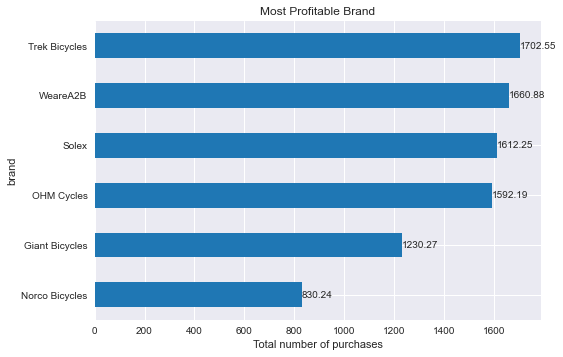

In [68]:
plt.style.use("seaborn")

ax= df1.plot.barh(cmap="tab20")
plt.title("Most Profitable Brand")
plt.xlabel("Total number of purchases")

for containter in ax.containers:
    ax.bar_label(containter)

plt.savefig("Profitable Brand.png")
plt.show()

In [69]:
df2= New_CustomerTitle.groupby(["brand","Customer Title"])["Profit"].mean().unstack()
# df2.sort_values(ascending=False, inplace=True)

In [70]:
df2

Customer Title,Bronze,Gold,Platinum,Silver
brand,,,,
Giant Bicycles,466.525383,467.190792,482.832142,473.751658
Norco Bicycles,309.538742,294.812847,298.286483,292.238611
OHM Cycles,438.996838,487.470827,512.255858,469.066273
Solex,540.287837,577.197117,576.936092,560.554164
Trek Bicycles,610.470020,619.786954,607.910478,629.632687
WeareA2B,786.572844,850.318148,847.198616,834.801135


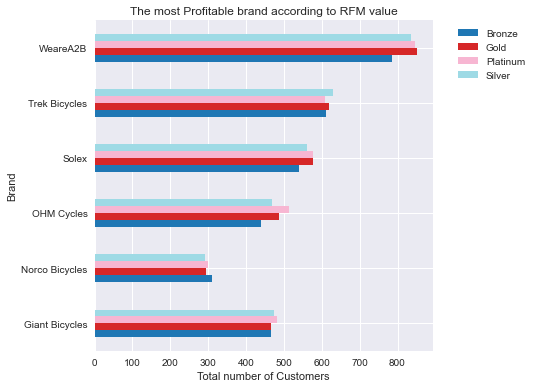

In [71]:
plt.style.use('seaborn')
ax= df2.plot.barh(cmap="tab20")

plt.xlabel("Total number of Customers")
plt.ylabel("Brand")
plt.title("The most Profitable brand according to RFM value")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tight_layout()


# for containter in ax.containers:
#     ax.bar_label(containter)

plt.savefig("Profitable brand per RFM.png")

plt.show()

In [72]:
df3= New_CustomerTitle.groupby(["wealth_segment", "Customer Title"])["Customer Title"].count().unstack()
df3.sort_values(by=["Bronze","Gold","Platinum","Silver"], ascending=False, inplace=True)

In [73]:
df3

Customer Title,Bronze,Gold,Platinum,Silver
wealth_segment,,,,
Mass Customer,1672,2065,4452,1862
Affluent Customer,849,1125,1999,885
High Net Worth,798,1003,2373,914


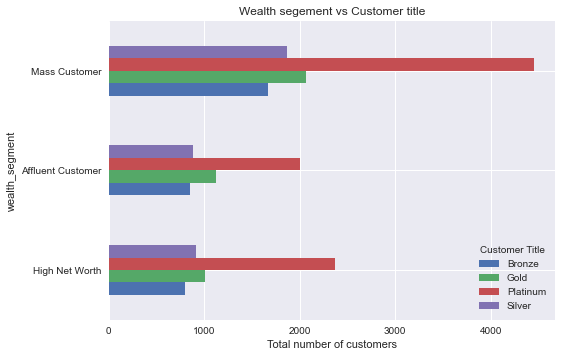

In [74]:
# create a scatter plot of the data
df3[::-1].plot.barh()

# add axis labels and title
plt.xlabel("Total number of customers")

plt.title("Wealth segement vs Customer title")

plt.savefig("Wealth segement vs Customer title")
plt.show()

In [75]:
df4= New_CustomerTitle.groupby("gender")["past_3_years_bike_related_purchases"].mean()
df4.sort_values(ascending=False, inplace=True)

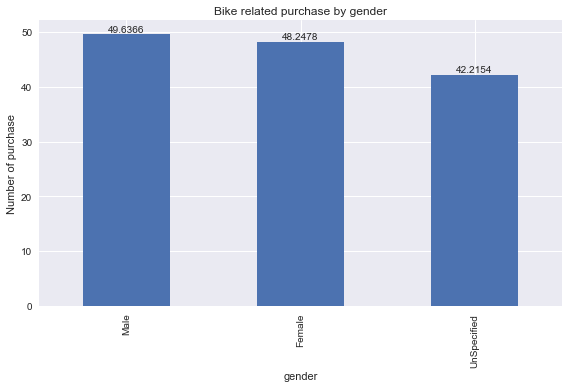

In [96]:
plt.style.use("seaborn")

ax= df4.plot.bar()
plt.title("Bike related purchase by gender")
plt.ylabel("Number of purchase")

for containter in ax.containers:
    ax.bar_label(containter)

plt.tight_layout()
plt.savefig("Bike related purchase by gender")
plt.show()

In [77]:
df6= New_CustomerTitle.groupby(["Customer Title","job_industry_category"])["job_industry_category"].count().unstack()
df6

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications
Customer Title,,,,,,,,,
Bronze,104,132,678,416,179,658,208,288,73
Gold,84,164,710,704,232,931,274,401,60
Platinum,259,265,1843,1425,459,1657,582,732,159
Silver,131,137,655,554,214,768,233,337,62


<AxesSubplot:ylabel='Customer Title'>

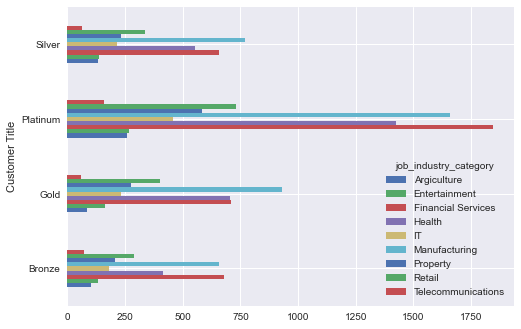

In [78]:
plt.style.use("seaborn")
df6.plot.barh()

In [79]:
New_CustomerTitle.to_csv("Customers.csv")

### Getting age

In [80]:
New_CustomerTitle["deceased_indicator"].value_counts()

N    19989
Y        8
Name: deceased_indicator, dtype: int64

In [81]:
filt = New_CustomerTitle["deceased_indicator"] == "N"

New_CustomerTitle.loc[filt]

,customer_id,Customer Title,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Recency
0,1,Platinum,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,1,Platinum,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268
2,1,Platinum,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233
3,1,Platinum,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359
4,1,Platinum,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,3500,Bronze,6309,69,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,...,No,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355
19993,3500,Bronze,8416,74,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,...,No,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317
19994,3500,Bronze,8562,33,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,...,No,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144
19995,3500,Bronze,14870,22,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,...,No,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353


In [82]:
current_time = pd.Timestamp.now().strftime('%Y-%m-%d')
print(current_time)

2023-03-09


In [83]:
New_CustomerTitle["DOB"] = pd.to_datetime(New_CustomerTitle["DOB"], format='%Y-%m-%d')

In [84]:
df['Age'] =((current_time- New_CustomerTitle["DOB"])/ pd.Timedelta(days=365.25)).astype(int)

TypeError: unsupported operand type(s) for -: 'DatetimeArray' and 'str'

In [ ]:
New_CustomerTitle['DOB'] = pd.to_datetime(New_CustomerTitle['DOB'])
New_CustomerTitle['Age'] = ((pd.Timestamp.now() - New_CustomerTitle['DOB']) / pd.Timedelta(days=365.25)).astype(int)
New_CustomerTitle.loc[New_CustomerTitle['deceased_indicator'] == 'Y', 'Age'] = 'Deceased'
New_CustomerTitle.loc[pd.isna(New_CustomerTitle['DOB']), 'Age'] = None

In [ ]:
print(New_CustomerTitle['Age'].isnull().sum())
print(np.isinf(New_CustomerTitle['Age']).sum())

In [ ]:
New_CustomerTitle.info()

In [ ]:
pd.Timestamp.now()

In [ ]:
New_CustomerTitle["DOB"]